In [193]:
from pylab import *
from IPython.display import Image

rcParams['figure.figsize'] = [10, 5]

# 1- 
La presión barométrica $p$ a una determinada altura $h$, esta descrita por la siguiente ecuación diferencial.

$$ \frac{dP}{dh} = - \frac{mg}{T k_{B}}\,P$$

Donde $m$ es  la masa de una molécula,  $g$ es el valor de la gravedad, $k_{B}$ la constante de Boltzmann, y $T$ el valor de la temperatura.

#### a) 
Si la altura $h$ sobre el nivel del mar de la Ciudad de México es de 2250m, calcula la variación barométrica resolviendo la EDO con el método de tu preferencia. Considera $P_{o} =1$, $k_{B}=1$, $m=1$, y $T = 25^{\circ}C$.
    Realiza en una gráfica $h$ vs $P$, donde la altura estará comprendida entre $h=0$ y $h_{max}$. 
    
#### b)

Vuelve a calcular la presión final (el ultimo valor de presión al resolver la EDO) si ahora la temperatura varia en un intervalo $T = [0^{\circ}, 46^{\circ}C]$ con 200 valores. Gráfica la temperatura vs la presión final.


In [194]:
#f la ec de la EDO
#xo la condicion inicial
#a,b los extremos del intervalo
#N las interaciones

def Euler(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        x.append(x[i]+h*f(x[i],a+h*(i+1)))
    return x

def RK2(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        x.append(x[i]+k2)
    return x

def RK4(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        k3=h*f(x[i]+0.5*k2,a+h*(i+1)+0.5*h)
        k4=h*f(x[i]+k3,a+h*(i+1)+h)
        x.append(x[i]+(k1+2*k2+2*k3+k4)/6)
    return x


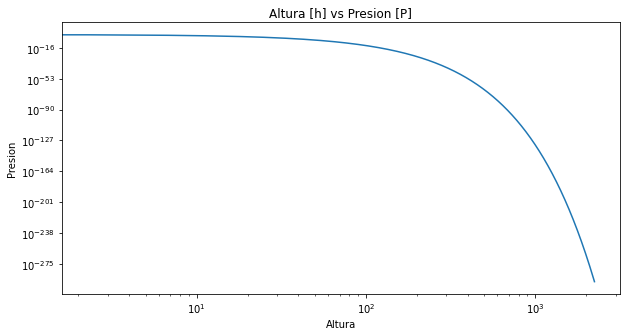

In [195]:
#a)
Po=1
Kb=1
m=1
T=25
g=10

def f(P,h):
    return -m*g*P/(T*Kb)

q=RK2(f,0,2250,Po,1000)

alturas=np.linspace(0,2250,1000)
plot(alturas,q)
xscale("log")
yscale("log")
plt.title("Altura [h] vs Presion [P]")
plt.ylabel("Presion")
plt.xlabel("Altura")
show()

Text(0.5, 0, 'Temperatura')

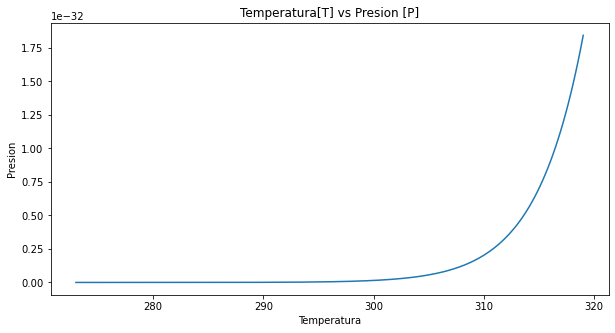

In [196]:
#b) 
Temp=np.linspace(273,46+273,200)
l=[] #Lista ultimo valor delas soluciones
for T in Temp:
    sol=Euler(f,0,2250,Po,1000)
    l.append(sol[-1])
plot(Temp,l)
plt.title("Temperatura[T] vs Presion [P]")
plt.ylabel("Presion")
plt.xlabel("Temperatura")

# 2- 
Un determinado material es sometido a una diferencial de potencial para verificar la relacion entre la corriente a la que es expuesto $t$ y el calor que irradia $X$. 

Los datos sugieren la siguiente relacion

$$ \frac{dx}{dt} =  e^{x} \tan \frac{t^{2}}{e^{t^{2}}}$$

#### a) 
Resuelve la ecuacion diferencial si la corriente vario desde $t=0$ hasta $t=5$
    
#### b)
Interpreta tus resultados.


In [197]:
#a)
xo=0
def f(x,t):
    return (e**x)* tan((t**2) / (e**(t**2)))
s=Euler(f, 0, 5, xo, 1000)

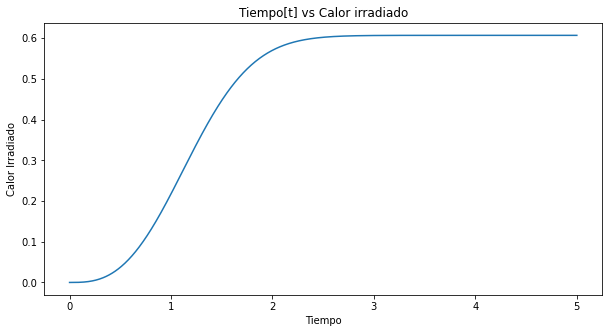

In [198]:
t=np.linspace(0,5,1000)
plot(t,s)
# xscale("log")
# yscale("log")
plt.title("Tiempo[t] vs Calor irradiado")
plt.ylabel("Calor Irradiado")
plt.xlabel("Tiempo")
show()

# b)
R= Podemos observar que entre mas pasa el tiempo mas irradia calor hasta llegar a $t \in [1.5,2.5]$ en cual alcanza un calor irradiado de 0.6 y despues se vuelve constante, es decir se mantiene en este valor

# 3 -

La fuerza de arrastre $F_{D}$ que actúa sobre cierto objeto en caída libre, puede ser aproximada por
$$F_{D} = a\nu^{2}e^{-by}. $$
donde $\nu$ es la velocidad del objeto, $y$ la altura, mientras que $a$ y $b$ son constantes que dependen del objeto y del fluido.

El termino exponencial explica el cambio de la densidad del aire con  la altura. La ecuación diferencial que describe  la caída del objeto es

$$ m\ddot{y} = -mg + F_{D}. $$

#### a )
Encuentra el tiempo $t$ en que el objeto toca el suelo, para ello soluciona la ecuación diferencial si $y(0)=9000 \,m$ y $\dot{y}=0$. Considera el valor de las siguientes constantes $m=114\,kg$, $a=7.45 \,kg/m$, $b=10.53$x$10^{-5} \,m^{-1}$, y $g=9.8 \,m/s^{2}$.

#### b) 
Encuentra el Encuentra el tiempo $t$ en que el objeto toca el suelo, para un objeto en caída libre sin fuerza de arrastre $ m\ddot{y} = -mg $. Utiliza Leapfrog.

#### c) 
Haz una gráfica de las dos clases de movimientos, y realiza un análisis de la misma.


In [199]:
m=114
a=7.45
b=10.53e-5
g=9.8

def f(r,t):
    x=r[0]
    v=r[1]
    fx=v
    fv=-g+(a/m * v**2 * exp(-x * b))
    return array([fx,fv],float)

t1,t2=0.0,600.0
N=1000
h=(t2-t1)/N
lista_t=arange(t1,t2,h)
lista_x,lista_y=[],[]
r=array([9000,0],float) #condiciones iniciales
for t in lista_t:   
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
    lista_x.append(r[0])
    lista_y.append(r[1])


Text(0.5, 0, 'Tiempo')

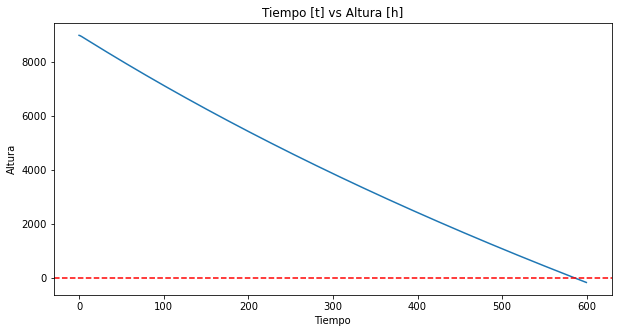

In [200]:
plot(lista_t,lista_x)
axhline(0, color="r", linestyle="--") 
plt.title("Tiempo [t] vs Altura [h]")
plt.ylabel("Altura")
plt.xlabel("Tiempo")

In [201]:
#Funcion que devuelve las soluciones de una EDO de segundo orden
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi la condicion inicial de la solucion
#vi la condicion inicial de la derivada
#h es el tamaño de paso
#metodo, es la tecnica a utilizar
def EDO2(f, to, tf, xi, vi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x = []
    lista_v = []
    r = array([xi,vi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_v.append(r[1])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_v)
def Euler2(f,r,t,h):
    r += h * f(r,t)
        
def RK22(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2
        
def RK42(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t+ 0.5*h)
    k4 = f(r + h*k3, t + h)
    r += h/6 * (k1 + 2*k2 + 2*k3 + k4)


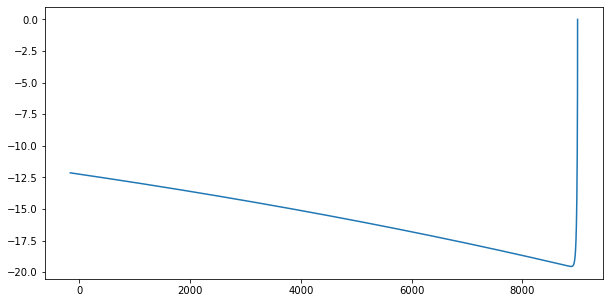

In [202]:
w=EDO2(f,0,600,9000,0,0.1,Euler2)
plot(w[1],w[2])

In [55]:
# #Lo hice con RK para darme una idea de como tenia que salir la grafica
# m=114
# g=9.8
# def f(r,t):
#     x=r[0]
#     v=r[1]
#     fx=v
#     fv=-g
#     return array([fx,fv],float)
# t1,t2=0.0,50.0
# N=1000
# h=(t2-t1)/N
# lista_t=arange(t1,t2,h)
# lista_x,lista_y=[],[]
# r=array([9000,0],float) #condiciones iniciales
# for t in lista_t:   
#     k1=h*f(r,t)
#     k2=h*f(r+0.5*k1,t+0.5*h)
#     k3=h*f(r+0.5*k2,t+0.5*h)
#     k4=h*f(r+k3,t+h)
#     r+=(k1+2*k2+2*k3+k4)/float(6)
#     lista_x.append(r[0])
#     lista_y.append(r[1])

Text(0.5, 0, 'Tiempo')

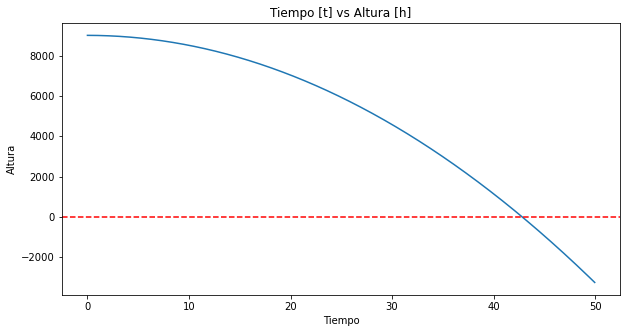

In [56]:
# plot(lista_t,lista_x)
# axhline(0, color="r", linestyle="--") 
# plt.title("Tiempo [t] vs Altura [h]")
# plt.ylabel("Altura")
# plt.xlabel("Tiempo")

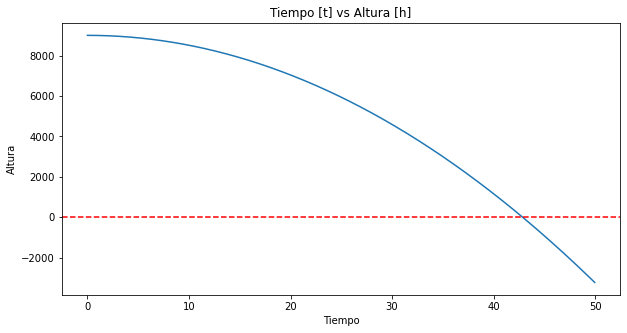

In [203]:
#Solución de Leap-Frog
from pylab import *
g=9.8
def F(r,t):
    x=r[0]
    v=r[1]
    fx=v
    fv=-g
    return array([fx,fv],float)

a = 0.0
b = 50
N = 1000
h = (b-a)/N
 
lista_T = arange(a,b,h)
lista_theta = []
lista_omega = []

r = array([9000,0],float)
rH = r+0.5*h*F(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*F(rH,t+0.5*h)
    rH+=h*F(r,t+h)
    lista_omega.append(r[1])
    
plot(lista_T,lista_theta)
xlabel("Tiempo")
ylabel("Altura")
title("Tiempo [t] vs Altura [h]")
axhline(0, color="r", linestyle="--") 
show()


Text(0.5, 0, 'Tiempo')

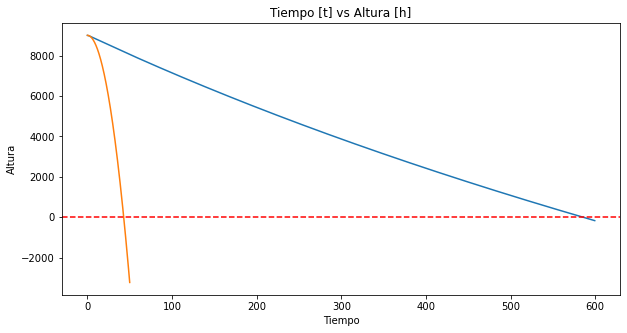

In [204]:
#c)
plot(lista_t,lista_x)
plot(lista_T,lista_theta)
axhline(0, color="r", linestyle="--") 
plt.title("Tiempo [t] vs Altura [h]")
plt.ylabel("Altura")
plt.xlabel("Tiempo")

Como podemos notar el objeto en donde ignoramos la fuerza de arrastre cae cuando $t \in (40,50)$ y cuando hay fuerza de arrastre cae cuando $t\approx600$, con lo que podemos concluir que cuando hay fuerza de arrastre los objetos tardaran mas en caer

# 4 - 


Un Sistema de masa resorte, presenta las siguientes ecuaciones acopladas

$$  m_1\ddot{\theta}_1 = - k_1\theta_1 + k_2(\theta_2 - \theta_1)   $$
 $$  m_2\ddot{\theta}_2 = - k_2(\theta_2 - \theta_1)   $$

 
 
Notemos que podemos reescribir el anterior sistema de ecuaciones de manera matricial como 


$$ \left(\begin{matrix} m_1 & 0\\ 0 & m_2\end{matrix}\right)
\left(\begin{matrix} \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix}\right)
= \left(\begin{matrix} - k_1\theta_1 + k_2(\theta_2 - \theta_1) \\  
- k_2(\theta_2 - \theta_1) \end{matrix}\right)
$$


A x = B

In [205]:
def Masa_resorte(r, t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = b
    
    #definimos la matriz A
    a11 = 1 #m1
    a12 = 0
    a21 = 0
    a22 = 1 #m2
    A = np.array([ [a11, a12], [a21, a22] ])
    
    #elementos del vector B
    b1 = -k1*x1 + k2*(x2-x1)
    b2 = -k2*(x2-x1)
    B  = array([b1,b2]) 
    
    #despejar x, este vector tendra las segundas derivadas
    x = inv(A).dot(B)
    
    #Despues de aplicar el metodo iterativo para solucionar la EDO
    #el nuevo vector r tendra r1=posicion1,  r2=posicion2
    #r3 = velocidad1,  r4= velocidad2=2
    
    r = array([v1, v2, x[0], x[1]])
    return r


In [206]:
#Para EDO de orden 2 acopladas
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi  la condicion inicial de la solucion de la primera funcion
#vxi la condicion inicial de la derivada de la primera funcion
#yi  la condicion inicial de la solucion de la segunda funcion
#vyi la condicion inicial de la derivada de la segunda funcion
#h es el tamaño de paso
#metodo, es la tecnica a utilizar, de la slistadas arriba

def EDO2_acoplada(f, to, tf, xi, vxi, yi, vyi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x  = []
    lista_y  = []
    lista_vx = []
    lista_vy = []
    r = array([xi,yi,vxi,vyi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_y.append(r[1])
        lista_vx.append(r[2])
        lista_vy.append(r[3])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_y, lista_vx, lista_vy)


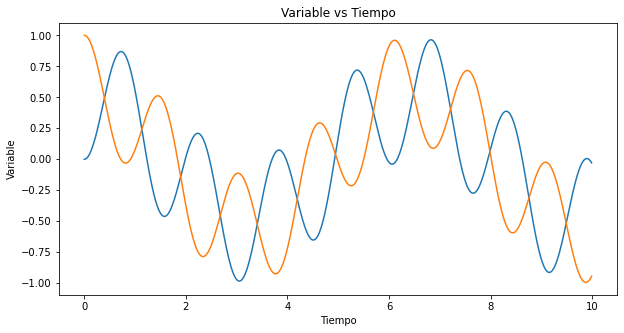

In [207]:
#constantes del problema
k1 = 2
k2 = 8
m1 = 2
m2 = 100

#condiciones iniciales
x1 = 0
x2 = 1
v1 = 0
v2 = 0

MS = EDO2_acoplada(Masa_resorte, 0, 10, x1, v1, x2, v2, 0.01, RK42)
plot(MS[0], MS[1])
plot(MS[0], MS[2])
title("Variable vs Tiempo")
xlabel("Tiempo")
ylabel("Variable")
show()

Text(0.5, 1.0, 'Espacio fase')

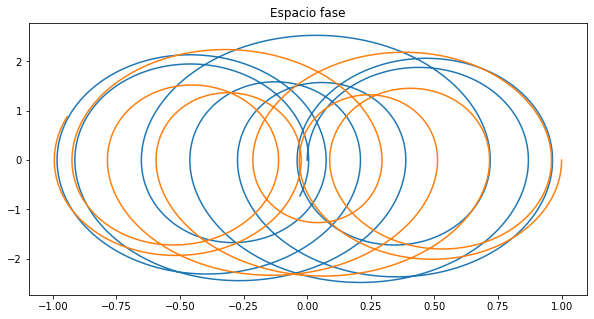

In [208]:
plot(MS[1], MS[3])
plot(MS[2], MS[4])
title("Espacio fase")

## 5 -
Un pendulo unido a un resorte, presenta las siguientes ecuaciones diferenciales.

$$ \ddot{L} = \left ( L_{o} - L \right )\dot{\theta}^{2} - \frac{k}{m}L + g\cos\left ( \theta \right ).$$
$$ \ddot{\theta} = \frac{-1}{L_{o}-L}\left [g\sin\left ( \theta \right ) + 2\dot{L}\dot{\theta}  \right ].$$

#### a)
Ecuentra las soluciones para $L$ y $\theta$ para un intervalo de tiempo $t_{o} = 0\,s$, $t_{f} =25\,s$ con las siguientes condiciones iniciales 

$L(t=0) = 1m $

$\dot{L}(t=0) = 0 \,m/s$

$\theta(t=0) = 0.3 \,rad$

$\dot{\theta}(t=0) = 2 \,rad/s$ 


Las constantes del sistema son $g = 9.8 \,m/s^{2}$, $L_{o}=1\,m$, $m= 0.1\,kg$, $k = 3.5 \,N/m$; 

#### b)
Encuentra y analiza el espacio fase de ambas ecuaciones.

#### c)
Grafica la posicion X vs la posicion Y del pendulo.

#### d)
Repite el procedimiento al variar la masa y la constante del resorte a los valores que tu prefieras.  Haz un analisis de todo el problema

In [209]:
#a)
def Sistema_nuevo(r, t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = b
    
    #definimos la matriz A
    a11 = m #m1
    a12 = 0
    a21 = 0
    a22 = m#m2
    A = np.array([ [a11, a12], [a21, a22] ])
    
    #elementos del vector B
    b1 = (L0+x1)*v2**2-(k/m)*x1+g*cos(x2)
    b2 = (-1/(L0+x1))*(g*sin(x2)+2*v1*v2)
    B  = array([b1,b2]) 
    
    #despejar x, este vector tendra las segundas derivadas
    x = inv(A).dot(B)
    
    #Despues de aplicar el metodo iterativo para solucionar la EDO
    #el nuevo vector r tendra r1=posicion1,  r2=posicion2
    #r3 = velocidad1,  r4= velocidad2=2

    r = array([v1, v2, x[0], x[1]])
    return r

Text(0.5, 0, 'Tiempo')

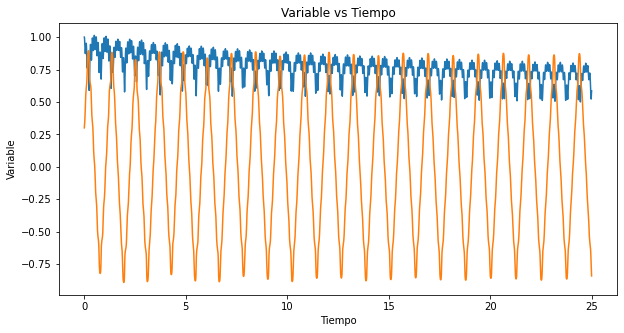

In [210]:
#constantes del problema
g = 9.81
k = 3.5
m = 0.1

#condiciones iniciales
L0 = 1
v0 = 0
q0=0.3 #angulo radianes
va = 2 #v angular

MS = EDO2_acoplada(Sistema_nuevo, 0, 25, L0, v0, q0, va, 0.01, RK42)
plot(MS[0], MS[1])
plot(MS[0], MS[2])

plt.title("Variable vs Tiempo")
plt.ylabel("Variable")
plt.xlabel("Tiempo")

Text(0.5, 0, 'Variable')

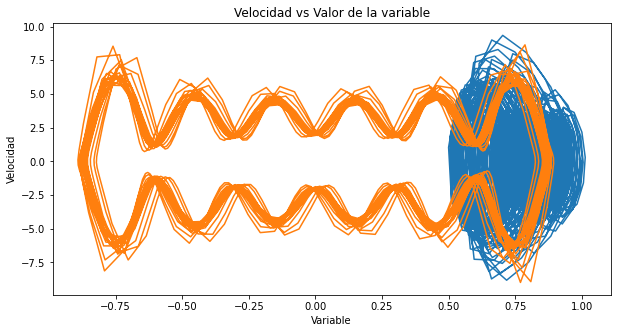

In [211]:
#b)
plot(MS[1], MS[3])
plot(MS[2], MS[4])
plt.title("Velocidad vs Valor de la variable")
plt.ylabel("Velocidad")
plt.xlabel("Variable")

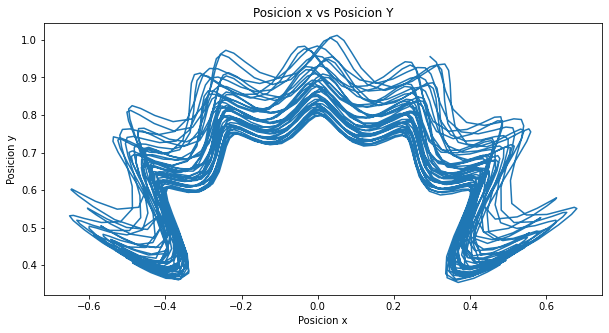

In [212]:
#c)
X=MS[1]*sin(MS[2])
Y=MS[1]*cos(MS[2])
plot(X,Y)
plt.title("Posicion x vs Posicion Y")
plt.ylabel("Posicion y")
plt.xlabel("Posicion x")
show()

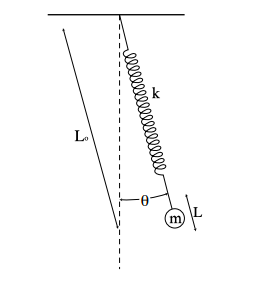

In [13]:
Image('Pendulo_resorte.png')

Text(0.5, 0, 'Tiempo')

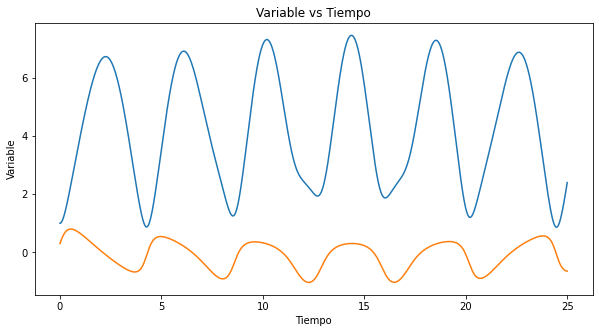

In [213]:
# d) Ahora variando las constantes k y m
g = 9.81
k = 2.5
m = 1

#condiciones iniciales
L0 = 1
v0 = 0
q0=0.3 #angulo radianes
va = 2 #v angular

MS = EDO2_acoplada(Sistema_nuevo, 0, 25, L0, v0, q0, va, 0.01, RK42)
plot(MS[0], MS[1])
plot(MS[0], MS[2])

plt.title("Variable vs Tiempo")
plt.ylabel("Variable")
plt.xlabel("Tiempo")

Text(0.5, 0, 'Variable')

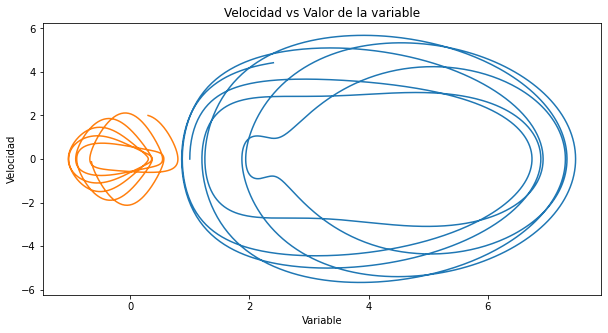

In [214]:
plot(MS[1], MS[3])
plot(MS[2], MS[4])
plt.title("Velocidad vs Valor de la variable")
plt.ylabel("Velocidad")
plt.xlabel("Variable")

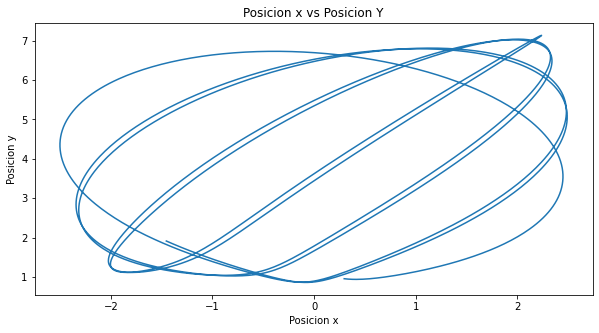

In [215]:
X=MS[1]*sin(MS[2])
Y=MS[1]*cos(MS[2])
plot(X,Y)
plt.title("Posicion x vs Posicion Y")
plt.ylabel("Posicion y")
plt.xlabel("Posicion x")
show()

## 6-

#### a) 
Usando la ley de gravitación universal y la segunda ley de newton, gráfica la orbita de la tierra.

#### b)
Obten nuevamente la orbita terrestre usando el metodo de Verlet. Realiza una grafica de dispersion entre ambos metodos y da una conclusion con tus propias palabras




La ecuacion vectorial que describe el movimiento se define como:
$$\frac{\mathrm{d}^{2}\vec{r} }{\mathrm{d} t^{2}} = -GM\frac{\hat{r}}{r^{3}}$$



Si $ r = x \hat{i} + y \hat{j} $,  tenemos dos ecuaciones acopladas de segundo orden.


$$
\frac{d^2x}{dt^2}=-G\frac{M}{r^2} \frac{x}{r} = -G \frac{Mx}{(x^2+y^2)^{\frac{3}{2}}}\\
\frac{d^2y}{dt^2}=-G\frac{M}{r^2} \frac{y}{r} = -G \frac{My}{(x^2+y^2)^{\frac{3}{2}}}
$$

* Descomponemos en dos de orden 1

$$\frac{dx}{dt} = v_x \,\,\,\,\,\,\,\,\,\,\,\,\frac{dv_x}{dt} = -G \frac{Mx}{(x^2+y^2)^{\frac{3}{2}}}$$

$$\frac{dy}{dt} = v_y \,\,\,\,\,\,\,\,\,\,\,\,\frac{dv_y}{dt} = -G \frac{My}{(x^2+y^2)^{\frac{3}{2}}}$$


In [216]:
def Sol(r, t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = b
    
    #definimos la matriz A
    a11 = 1 #m1
    a12 = 0
    a21 = 0
    a22 = 1 #m2
    A = np.array([ [a11, a12], [a21, a22] ])
    
    #elementos del vector B
    b1 = -G*(M*x1)/((x1**2 + x2**2) ) **(3/2)
    b2 = -G*(M*x2)/((x1**2 + x2**2) ) **(3/2)
    B  = array([b1,b2]) 
    
    #despejar x, este vector tendra las segundas derivadas
    x = inv(A).dot(B)
    
    #Despues de aplicar el metodo iterativo para solucionar la EDO
    #el nuevo vector r tendra r1=posicion1,  r2=posicion2
    #r3 = velocidad1,  r4= velocidad2=2
    
    r = array([v1, v2, x[0], x[1]])
    return r

In [217]:
### ctes Universales
M = 1.989e30      #masa sol
G  = 6.6743e-11    #cte gravitacion
rt = 1.496e11       #radio tierra sol
vt = 29800          #vel tierra
mt = 5.98e24        #masa tierra
tto = 0             #tiempo inicial
ttf = 365*24*3600   #1 año
N = 10000
h = abs(ttf-tto)/N


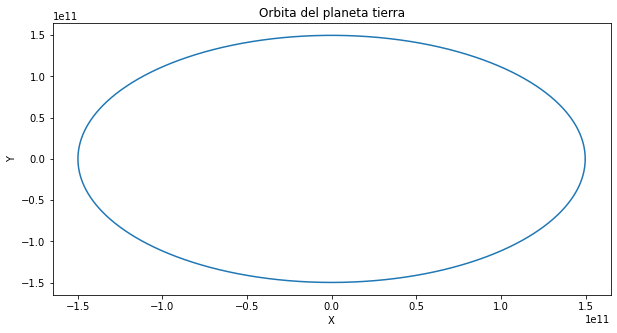

In [218]:
MS = EDO2_acoplada(Sol,tto,ttf, rt, 0, 0,vt, h, RK42)
plot(MS[1], MS[2])
title("Orbita del planeta tierra")
xlabel("X")
ylabel("Y")
show()

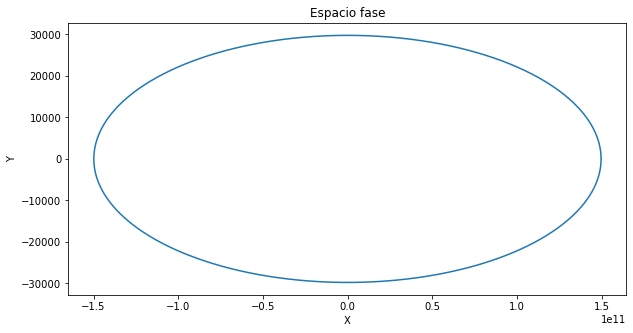

In [219]:
plot(MS[1], MS[3])
title("Espacio fase")
xlabel("X")
ylabel("Y")
show()

In [220]:
def Sol1(r, t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = b
    
    #definimos la matriz A
    a11 = 1 #m1
    a12 = 0
    a21 = 0
    a22 = 1 #m2
    A = np.array([ [a11, a12], [a21, a22] ])
    
    #elementos del vector B
    b1 = -G*(M*x1)/((x1**2 + x2**2) ) **(3/2)
    b2 = -G*(M*x2)/((x1**2 + x2**2) ) **(3/2)
    B  = array([b1,b2]) 
    
    #despejar x, este vector tendra las segundas derivadas
    x = inv(A).dot(B)
    
    #Despues de aplicar el metodo iterativo para solucionar la EDO
    #el nuevo vector r tendra r1=posicion1,  r2=posicion2
    #r3 = velocidad1,  r4= velocidad2=2
    
    r = array([v1, v2, x[0], x[1]])
    return r

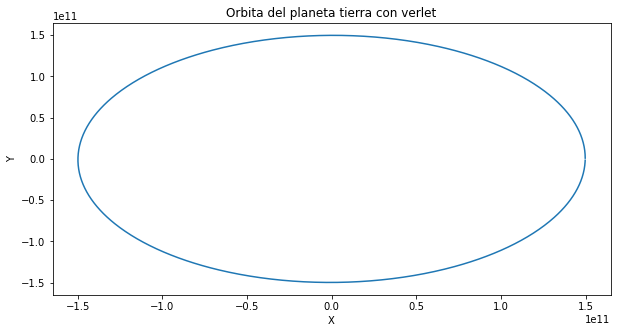

In [221]:

a = tto
b = ttf
N = 1000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []
lista_alpha = []
lista_Beta = []

r = array([rt,0,0,vt],float) #condiciones iniciales
rH = r+0.5*h*Sol1(r,0) #inicio paso intermedio
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*Sol1(rH,t+0.5*h)
    k=h*Sol1(r,t+h)
    v=rH+0.5*k
    rH+=h*Sol1(r,t+h)
    lista_omega.append(r[1])
    lista_alpha.append(r[2])
    lista_Beta.append(r[3])
    
plot(lista_theta,lista_omega)
title("Orbita del planeta tierra con verlet")
xlabel("X")
ylabel("Y")
show()

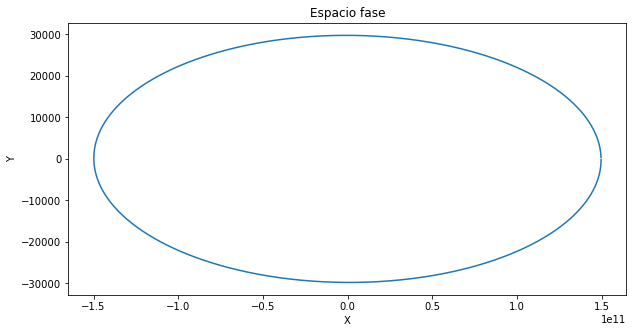

In [222]:
plot(lista_theta,lista_alpha)
title("Espacio fase")
xlabel("X")
ylabel("Y")
show()

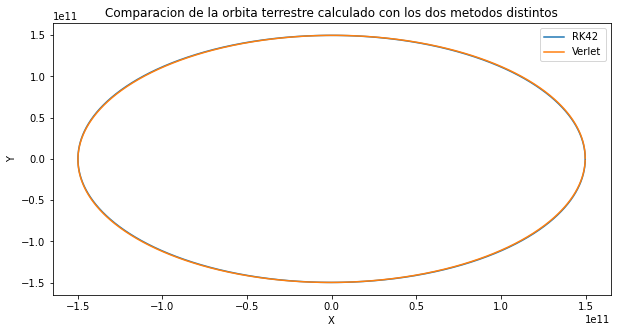

In [223]:
plot(MS[1], MS[2], label="RK42")
plot(lista_theta,lista_omega, label="Verlet")
title("Comparacion de la orbita terrestre calculado con los dos metodos distintos")
xlabel("X")
ylabel("Y")
legend()
show()

Como podemos ver ambos metodos funcionaron igual ya que no hay distincion entre estas dos orbitas obtenidas